In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
import pickle

In [2]:
def ReLU(Z):
    return np.maximum(Z,0)

def derivative_ReLU(Z):
    return Z > 0

def softmax(Z):

    exp = np.exp(Z - np.max(Z)) 
    return exp / exp.sum(axis=0)

def init_params(size):
    W1 = np.random.rand(10,size) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def forward_propagation(X,W1,b1,W2,b2):
    Z1 = W1.dot(X) + b1 #10, m
    A1 = ReLU(Z1) # 10,m
    Z2 = W2.dot(A1) + b2 #10,m
    A2 = softmax(Z2) #10,m
    return Z1, A1, Z2, A2

def one_hot(Y):

    one_hot_Y = np.zeros((Y.max()+1,Y.size))
    one_hot_Y[Y,np.arange(Y.size)] = 1 
    return one_hot_Y

def backward_propagation(X, Y, A1, A2, W2, Z1, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2*(A2 - one_hot_Y) #10,m
    dW2 = 1/m * (dZ2.dot(A1.T)) # 10 , 10
    db2 = 1/m * np.sum(dZ2,1) # 10, 1
    dZ1 = W2.T.dot(dZ2)*derivative_ReLU(Z1) # 10, m
    dW1 = 1/m * (dZ1.dot(X.T)) #10, 784
    db1 = 1/m * np.sum(dZ1,1) # 10, 1

    return dW1, db1, dW2, db2

def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10,1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10,1))

    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    size , m = X.shape

    W1, b1, W2, b2 = init_params(size)
    k = 10
    dictionary = {}
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W2, Z1, m)

        W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)   
        if (i+1) % 10 == 0:
            print(f"Iteration: {i+1} / {iterations}")
            prediction = get_predictions(A2)
            acc = get_accuracy(prediction, Y)
            print(f'{acc:.2%}')
            dictionary[k] = acc*100
            k += 10
    plt.plot(dictionary.keys(), dictionary.values(), color='blue')
    plt.show()
    
    return W1, b1, W2, b2

def make_predictions(X, W1 ,b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def show_prediction(index,X, Y, W1, b1, W2, b2):
    vect_X = X[:, index,None]
    prediction = make_predictions(vect_X, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = vect_X.reshape((WIDTH, HEIGHT)) * SCALE_FACTOR

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Iteration: 10 / 1000
16.45%
Iteration: 20 / 1000
18.47%
Iteration: 30 / 1000
20.26%
Iteration: 40 / 1000
22.08%
Iteration: 50 / 1000
23.96%
Iteration: 60 / 1000
25.87%
Iteration: 70 / 1000
27.71%
Iteration: 80 / 1000
29.37%
Iteration: 90 / 1000
30.84%
Iteration: 100 / 1000
32.23%
Iteration: 110 / 1000
33.55%
Iteration: 120 / 1000
34.67%
Iteration: 130 / 1000
35.77%
Iteration: 140 / 1000
36.77%
Iteration: 150 / 1000
37.80%
Iteration: 160 / 1000
38.82%
Iteration: 170 / 1000
39.89%
Iteration: 180 / 1000
40.86%
Iteration: 190 / 1000
41.81%
Iteration: 200 / 1000
42.87%
Iteration: 210 / 1000
43.86%
Iteration: 220 / 1000
44.95%
Iteration: 230 / 1000
45.95%
Iteration: 240 / 1000
46.97%
Iteration: 250 / 1000
48.00%
Iteration: 260 / 1000
48.98%
Iteration: 270 / 1000
49.94%
Iteration: 280 / 1000
50.91%
Iteration: 290 / 1000
51.88%
Iteration: 300 / 1000
52.86%
Iteration: 310 / 1000
53.77%
Iteration: 320 / 1000
54.64%
Iteration: 330 / 1000
55.53%
Iteration: 340 / 1000
56.41%
Iteration: 350 / 1000
5

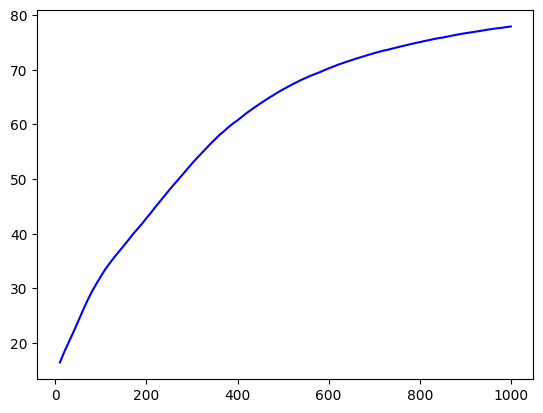

Prediction:  [7]
Label:  7


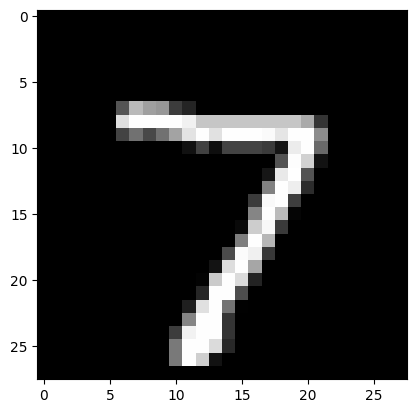

Prediction:  [2]
Label:  2


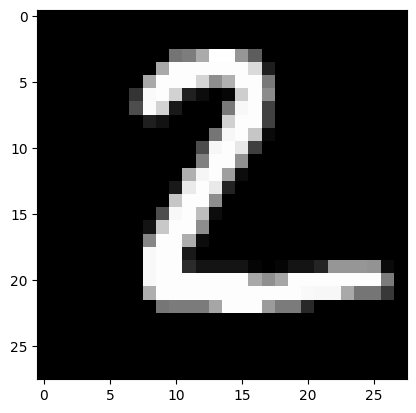

Prediction:  [1]
Label:  1


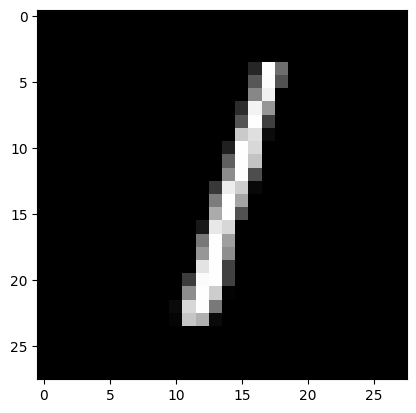

Prediction:  [6]
Label:  6


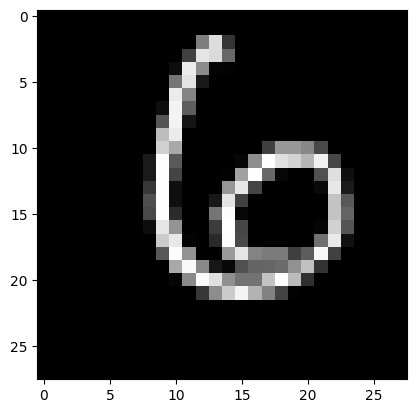

Prediction:  [3]
Label:  3


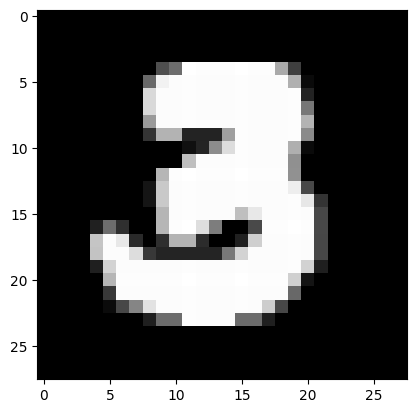

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
SCALE_FACTOR = 255 
WIDTH = X_train.shape[1]
HEIGHT = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],WIDTH*HEIGHT).T / SCALE_FACTOR
X_test = X_test.reshape(X_test.shape[0],WIDTH*HEIGHT).T  / SCALE_FACTOR

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.01, 1000)
with open("trained_params.pkl","wb") as dump_file:
    pickle.dump((W1, b1, W2, b2),dump_file)

with open("trained_params.pkl","rb") as dump_file:
    W1, b1, W2, b2=pickle.load(dump_file)
show_prediction(0,X_test, Y_test, W1, b1, W2, b2)
show_prediction(1,X_test, Y_test, W1, b1, W2, b2)
show_prediction(2,X_test, Y_test, W1, b1, W2, b2)
show_prediction(100,X_test, Y_test, W1, b1, W2, b2)
show_prediction(200,X_test, Y_test, W1, b1, W2, b2)